<a href="https://colab.research.google.com/github/Magagithub/Actividad3_2/blob/main/SNS_MiguelMagari%C3%B1o_ut3_a2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GaussianNB → Precisión: 1.0000


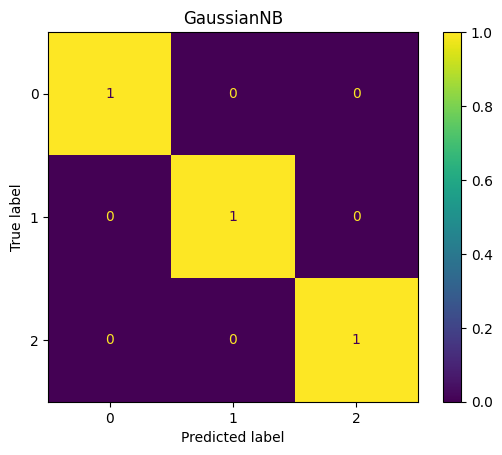

MultinomialNB → Precisión: 0.9000


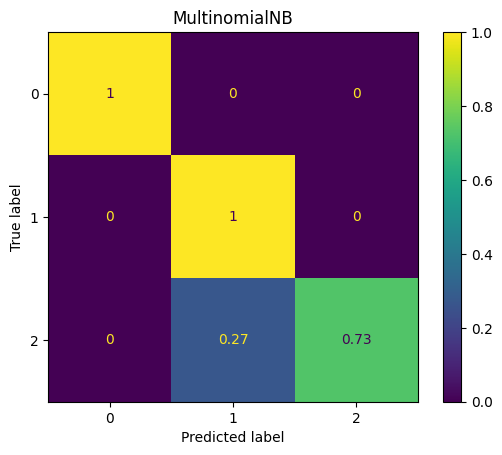

ComplementNB → Precisión: 0.7000


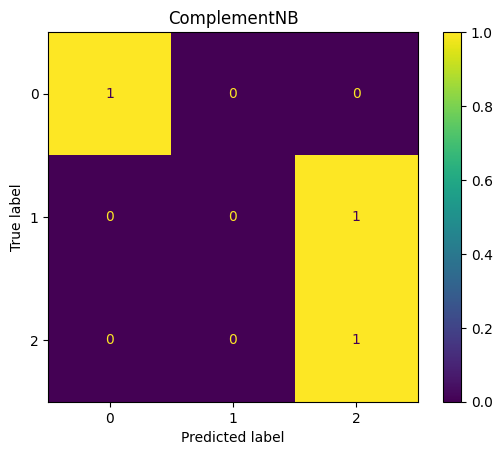

BernoulliNB → Precisión: 0.3000


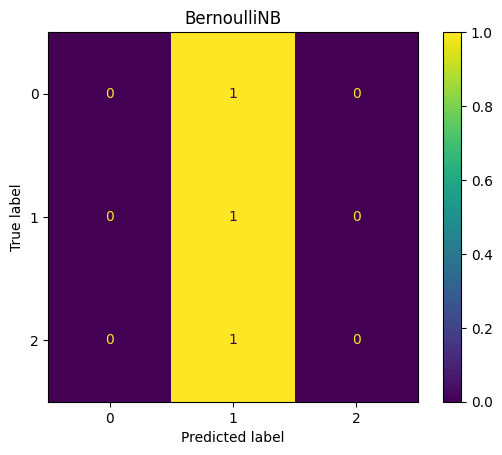

CategoricalNB → Precisión: 0.9667


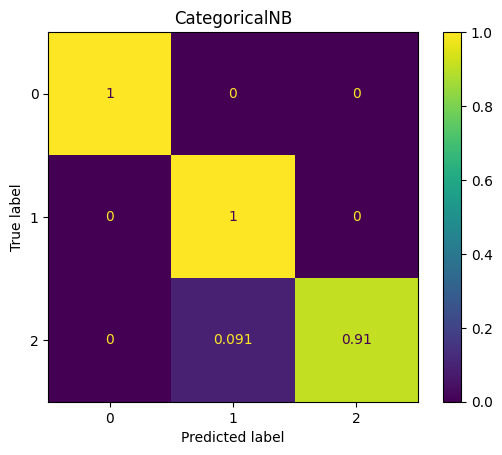

In [ ]:
# ===============================
#   ACTIVIDAD 3.2 - IRIS
# ===============================
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
import matplotlib.pyplot as plt
import numpy as np

# Cargar dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Clasificadores
models = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "ComplementNB": ComplementNB(),
    "BernoulliNB": BernoulliNB(),
}

# Para Categorical necesitamos discretizar:
cat_X_train = X_train.astype(int)
cat_X_test = X_test.astype(int)
models["CategoricalNB"] = CategoricalNB()

for name, model in models.items():
    if name == "CategoricalNB":
        model.fit(cat_X_train, y_train)
        preds = model.predict(cat_X_test)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    print(f"{name} → Precisión: {acc:.4f}")

    disp = ConfusionMatrixDisplay.from_predictions(y_test, preds, normalize="true")
    plt.title(name)
    plt.show()


GaussianNB → Precisión: 0.9851


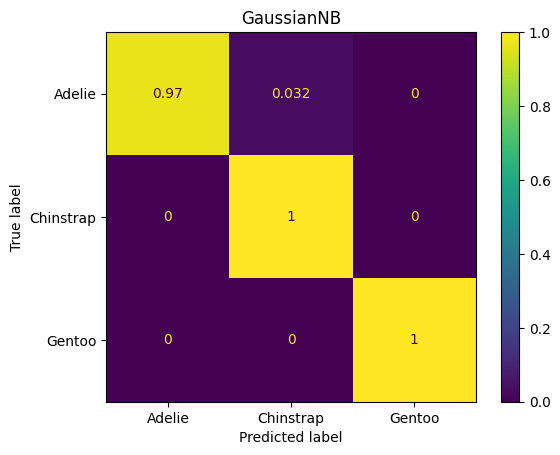

MultinomialNB → Precisión: 0.9701


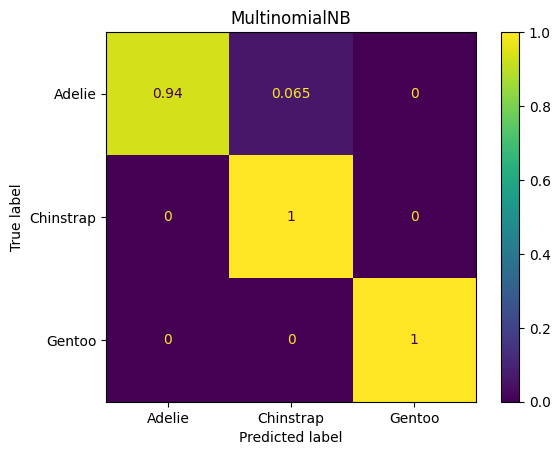

ComplementNB → Precisión: 0.9254


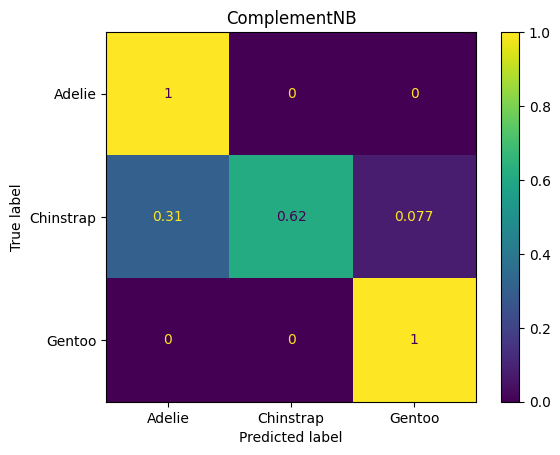

BernoulliNB → Precisión: 0.6567


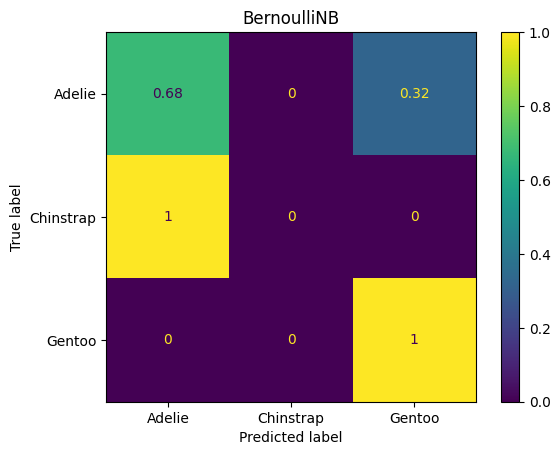

CategoricalNB → Precisión: 0.8806


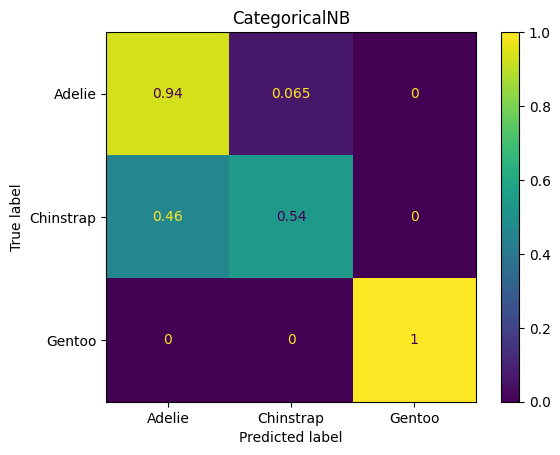

In [ ]:
# ===============================
#   ACTIVIDAD 3.2 - PENGUINS
# ===============================
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

penguins = sns.load_dataset("penguins")
penguins = penguins.dropna()

# Variables
X = penguins.drop("species", axis=1)
y = penguins["species"]

# Codificar categorías
encoder = OrdinalEncoder()
X = encoder.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Clasificadores
models = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "ComplementNB": ComplementNB(),
    "BernoulliNB": BernoulliNB(),
    "CategoricalNB": CategoricalNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    print(f"{name} → Precisión: {acc:.4f}")

    ConfusionMatrixDisplay.from_predictions(y_test, preds, normalize="true")
    plt.title(name)
    plt.show()
